# YOLOV3 model in production with Tensorflow-serving

### As instructed by Mr. Mario Loaiciga, here I am deploying my YOLOv3 model with Tensorflow-serving and binding it in Docker. 

### Model loading 
Downloading pre-trained weights.


In [2]:
import argparse
import os
import numpy as np
from keras.layers import Conv2D, Input, BatchNormalization, LeakyReLU, ZeroPadding2D, UpSampling2D
from keras.layers.merge import add, concatenate
from keras.models import Model
import struct
import cv2
from yolo3 import *
from tensorflow.keras.preprocessing import image
from keras.models import load_model


/home/rsb/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
model = make_yolov3_model()

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv_0 (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
bnorm_0 (BatchNormalization)    (None, None, None, 3 128         conv_0[0][0]                     
__________________________________________________________________________________________________
leaky_0 (LeakyReLU)             (None, None, None, 3 0           bnorm_0[0][0]                    
__________________________________________________________________________________________________
zero_paddi

***********************

## If loading Darknet Layers

In [5]:
weights_path = 'keras-yolo3/yolov3.weights'

In [6]:
weight_reader = WeightReader(weights_path)
weight_reader.load_weights(model)

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

*******************************************************

In [ ]:
model.save('yolov3.h5') #Saving the model

### Model testing
Testing the Accuracy/Performance of the model.

In [3]:
model = load_model('yolov3.h5')

Instructions for updating:
Colocations handled automatically by placer.


/home/rsb/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [13]:
image_path = 'tf_in_production/images/img1.jpg'

In [4]:
net_h, net_w = 416, 416
obj_thresh, nms_thresh = 0.5, 0.45
anchors = [[116,90,  156,198,  373,326],  [30,61, 62,45,  59,119], [10,13,  16,30,  33,23]]
labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", \
          "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", \
          "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", \
          "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", \
          "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", \
          "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", \
          "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", \
          "chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse", \
          "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", \
          "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]

In [5]:
image1 = cv2.imread('tf_in_production/images/img1.jpg')
image_h, image_w, _ = image1.shape
new_image = preprocess_input(image1,net_h,net_w)

In [6]:
yolos = model.predict(new_image)

In [7]:
print('Number of Output Layers - ',len(yolos))

Number of Output Layers -  3


# I need this 3 output tensors from my model for decoding my prediction by using the following code below. So when I save my model I need to take care of these 3 output tensors.

In [8]:
boxes = []

In [9]:
for i in range(len(yolos)):
        # decode the output of the network
        boxes += decode_netout(yolos[i][0], anchors[i], obj_thresh, nms_thresh, net_h, net_w)

In [10]:
correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w)
do_nms(boxes, nms_thresh)

In [11]:
draw_boxes(image1, boxes, labels, obj_thresh)

cat: 99.60602521896362%


array([[[212, 228, 234],
        [212, 228, 234],
        [215, 229, 235],
        ...,
        [220, 224, 229],
        [220, 224, 229],
        [220, 224, 229]],

       [[212, 228, 234],
        [212, 228, 234],
        [215, 229, 235],
        ...,
        [221, 225, 230],
        [219, 223, 228],
        [218, 222, 227]],

       [[214, 228, 234],
        [214, 228, 234],
        [214, 228, 234],
        ...,
        [220, 224, 229],
        [219, 223, 228],
        [218, 222, 227]],

       ...,

       [[220, 223, 227],
        [220, 223, 227],
        [221, 224, 228],
        ...,
        [173, 176, 181],
        [173, 176, 181],
        [169, 172, 177]],

       [[219, 222, 226],
        [219, 222, 226],
        [220, 223, 227],
        ...,
        [175, 178, 183],
        [174, 177, 182],
        [172, 175, 180]],

       [[219, 222, 226],
        [219, 222, 226],
        [220, 223, 227],
        ...,
        [174, 177, 182],
        [175, 178, 183],
        [175, 178, 183]]

In [14]:
cv2.imwrite(image_path[:-4] + '_detected' + image_path[-4:], (image1).astype('uint8'))

True

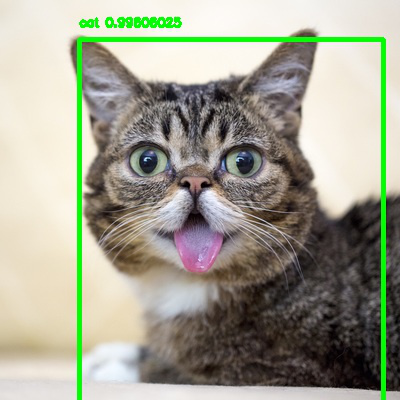

In [15]:
img = image.load_img(image_path.replace('img1','img1_detected'))
img

## I successfully implemented YOLOv3 Object Detection model and got good accuracy for the test image. Now I am going to serve this model.

### Model exporting

In [16]:
from tensorflow.keras import backend as K
K.set_learning_phase(0) # Deactivate train-only-layers like: batch norm and dropout

In [17]:
from tensorflow.python.saved_model import builder as saved_model_builder # protobuffer builder

export_path = 'export/yolov3/1' # should always end on int (model versioning)
builder = saved_model_builder.SavedModelBuilder(export_path)

In [20]:
model.input

<tf.Tensor 'input_1:0' shape=(?, ?, ?, 3) dtype=float32>

In [23]:
model.output

[<tf.Tensor 'conv_81/BiasAdd:0' shape=(?, ?, ?, 255) dtype=float32>,
 <tf.Tensor 'conv_93/BiasAdd:0' shape=(?, ?, ?, 255) dtype=float32>,
 <tf.Tensor 'conv_105/BiasAdd:0' shape=(?, ?, ?, 255) dtype=float32>]

In [43]:
from tensorflow.python.saved_model import tag_constants, signature_constants
from tensorflow.python.saved_model.signature_def_utils_impl import predict_signature_def

yolo3_input = dict()
yolo3_output = dict()
sess =  K.get_session()    
yolo3_input['image'] = sess.graph.get_tensor_by_name('input_1:0')
yolo3_output['prediction'] = sess.graph.get_tensor_by_name('conv_81/BiasAdd:0')
yolo3_output['prediction2'] = sess.graph.get_tensor_by_name('conv_93/BiasAdd:0')
yolo3_output['prediction3'] = sess.graph.get_tensor_by_name('conv_105/BiasAdd:0')


signature = predict_signature_def(inputs=yolo3_input,outputs=yolo3_output)

builder.add_meta_graph_and_variables(sess=sess,
                                    tags=[tag_constants.SERVING],
                                    signature_def_map={
                                        signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY:signature})
builder.save()

INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.


FailedPreconditionError: Attempting to use uninitialized value bnorm_0/beta
	 [[node save_3/SaveV2 (defined at <ipython-input-43-53c42cfa8108>:18) ]]

Caused by op 'save_3/SaveV2', defined at:
  File "/home/rsb/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/rsb/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-43-53c42cfa8108>", line 18, in <module>
    signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY:signature})
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/tensorflow/python/saved_model/builder_impl.py", line 578, in add_meta_graph_and_variables
    saver = self._maybe_create_saver(saver)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/tensorflow/python/saved_model/builder_impl.py", line 221, in _maybe_create_saver
    allow_empty=True)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 832, in __init__
    self.build()
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 844, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 881, in _build
    build_save=build_save, build_restore=build_restore)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 504, in _build_internal
    save_tensor = self._AddShardedSaveOps(filename_tensor, per_device)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 295, in _AddShardedSaveOps
    return self._AddShardedSaveOpsForV2(filename_tensor, per_device)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 269, in _AddShardedSaveOpsForV2
    sharded_saves.append(self._AddSaveOps(sharded_filename, saveables))
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 210, in _AddSaveOps
    save = self.save_op(filename_tensor, saveables)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 124, in save_op
    tensors)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1807, in save_v2
    name=name)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/home/rsb/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value bnorm_0/beta
	 [[node save_3/SaveV2 (defined at <ipython-input-43-53c42cfa8108>:18) ]]


# Issue I am facing in just this above Code snippet while saving the model in .pb format. I am trying to save my YOLO3 Graph as you can see I have considered multiple output tensors here (in this case 3 output tensors). I am unable to find solution for this on internet also. 

# I used to save and load my models using checkpoint files. Protocol Buffers (.pb) concept is new for me and I want to learn it. Please let me know the real concept behind this problem.

# However I wanted to give you short idea how I have implemented this ( if the .pb problem is solved).
 - I have implemented YOLO3 model which is working fine and giving me 3 outputs tensors.
 - So using these 3 output tensors I can decode the prediction.
 - So I will create a docker container serving this model using Tensorflow-serving taking image np-array as input and giving 3 output tensors.
 - Using these tensors I can decode the prediction and show the output as shown above in Model loading section.

## Docker Implementation

In [35]:
%%bash
tree ./export

./export
└── yolov3
    └── 1
        ├── saved_model.pb
        └── variables

3 directories, 1 file


In [36]:
%%bash
docker run -d -p 8500:8500 \
    --mount type=bind,source=$(pwd)/export/yolov3/,target=yolov3 \
    -e MODEL_NAME=yolov3 \
    --name yolov3_tfserving \
    -t tensorflow/serving:1.12.0 

docker: Got permission denied while trying to connect to the Docker daemon socket at unix:///var/run/docker.sock: Post http://%2Fvar%2Frun%2Fdocker.sock/v1.39/containers/create?name=yolov3_tfserving: dial unix /var/run/docker.sock: connect: permission denied.
See 'docker run --help'.


### Server Testing

In [41]:
# Protobuf assist classes compiled from TF's predit.proto and predict_service.proto
from tensorflow_serving.apis import predict_pb2 # creates proper prediction protobuffer message
from tensorflow import make_tensor_proto # create a proper protobuffer message 

# Instantiate a protobuffer filler object for a `predict.proto` message
request = predict_pb2.PredictRequest()

# Fill the protobuffer with model specific data
request.model_spec.name = 'yolov3' # same as directory name inside ./export
request.model_spec.version.value = 1 # same as directory name inside ./export/nasnet_mobile'
request.model_spec.signature_name = signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY
request.inputs['image'].CopyFrom(make_tensor_proto(image1, shape=image1.shape)) # fill tensor data

In [42]:
import grpc # to create a gRPC client
from tensorflow_serving.apis import prediction_service_pb2_grpc # grpc channel handle

# create a gRPC connection and server stub
channel = grpc.insecure_channel('localhost:8500') # (if model runs locally)
stub = prediction_service_pb2_grpc.PredictionServiceStub(channel) # instantiate a stub

# make a gRPC call to the server
response = stub.Predict(request, 100.0)  # 10 secs timeout
channel.close()
response

_Rendezvous: <_Rendezvous of RPC that terminated with:
	status = StatusCode.UNAVAILABLE
	details = "Connection reset by peer"
	debug_error_string = "{"created":"@1557865971.538806063","description":"Error received from peer","file":"src/core/lib/surface/call.cc","file_line":1039,"grpc_message":"Connection reset by peer","grpc_status":14}"
>

# Here we will get 3 output tensors in response.

- ### and those 3 output tensors (named yolos used in below codes) can be extracted from response and must be reshaped for further use.

In [19]:
boxes = []

In [ ]:
for i in range(len(yolos)):
        # decode the output of the network
        boxes += decode_netout(yolos[i][0], anchors[i], obj_thresh, nms_thresh, net_h, net_w)

In [ ]:
correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w)
do_nms(boxes, nms_thresh)

In [ ]:
draw_boxes(image1, boxes, labels, obj_thresh)

In [ ]:
cv2.imwrite(image_path[:-4] + '_detected' + image_path[-4:], (image1).astype('uint8'))

In [ ]:
img = image.load_img(image_path.replace('img1','img1_detected'))
img